In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
comfortable = ctrl.Antecedent(np.arange(0, 11, 1), 'comfortable')
convenient = ctrl.Antecedent(np.arange(0, 11, 1), 'convenient')
price = ctrl.Consequent(np.arange(0, 101, 1), 'price')

comfortable.automf(names=['low', 'medium', 'high'])
convenient.automf(names=['low', 'medium', 'high'])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
price['cheap'] = fuzz.trimf(price.universe, [0, 0, 25])
price['medium'] = fuzz.trimf(price.universe, [20, 50, 75])
price['expensive'] = fuzz.trimf(price.universe, [70, 100, 100])

/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


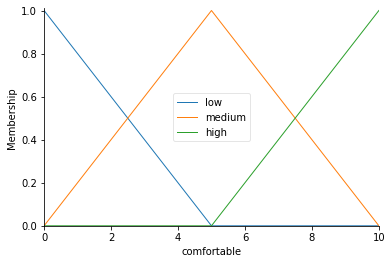

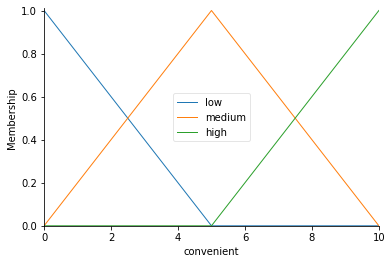

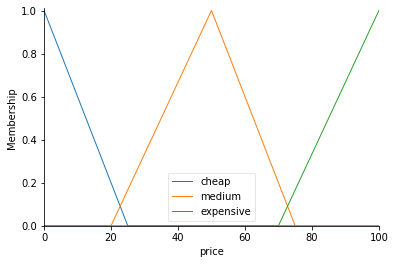

In [4]:
comfortable.view()
convenient.view()
price.view()

In [5]:
rule1 = ctrl.Rule(comfortable['low'] | convenient['low'], price['cheap'])
rule2 = ctrl.Rule(comfortable['medium'] | convenient['medium'], price['medium'])
rule3 = ctrl.Rule(convenient['high'] & comfortable['high'], price['expensive'])

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['comfortable'] = 10
tipping.input['convenient'] = 10

In [7]:
tipping.compute()

90.00000000000003


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


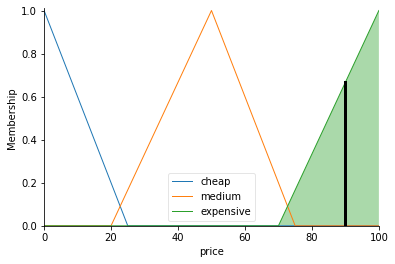

In [8]:
print(tipping.output['price'])
price.view(sim=tipping)